In [215]:
# https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2
# http://api.worldbank.org/v2/country
import pandas as pd
import urllib
import json

url = 'https://api.worldbank.org/v2/country?format=json&per_page=299'
response = urllib.request.urlopen(url)
json_data = json.loads(response.read())
country_codes = [_['iso2Code'] for _ in json_data[1]]
# country_codes
# countries = [
#     'US',
#     'CN',
#     'JP',
#     'DE',
#     'GB',
#     'IN',
#     'FR',
#     'IT',
#     'CA',
#     'KR',
#     'RU',
#     'BR',
#     'AU',
#     'ES',
#     'MX',
#     'ID',
#     'NL',
#     'CH',
#     'TR',
#     'SA',
# ]

In [216]:
import pandas as pd
import numpy as np
from pandas_datareader import wb
import matplotlib.pyplot as plt
from sklearn import linear_model

# 通貨増加率とインフレ率の関係

https://data.worldbank.org/indicator

- Broad money growth (annual %)
    - https://databank.worldbank.org/metadataglossary/world-development-indicators/series/FM.LBL.BMNY.ZG
- Inflation consumer price (annual %)
    - https://databank.worldbank.org/metadataglossary/world-development-indicators/series/FP.CPI.TOTL.ZG

In [217]:
money_growth = wb.download(indicator='FM.LBL.BMNY.ZG', start=2000, end=2020, country=country_codes)
money_growth = money_growth.rename(columns={'FM.LBL.BMNY.ZG': 'money_growth'})
inflation    = wb.download(indicator='FP.CPI.TOTL.ZG', start=2000, end=2020, country=country_codes)
inflation = inflation.rename(columns={'FP.CPI.TOTL.ZG': 'inflation'})
# money_growth = money_growth.sort_values(by=['country', 'year', 'money_growth'])
# inflation = inflation.sort_values(by=['country', 'year', 'inflation'])
# print(money_growth.isna().sum())
# print(inflation.isna().sum())
# money_growth.query("money_growth != money_growth")

/Users/k-kakimoto/dev/ml_samples/.venv/lib/python3.8/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: 1A, 1W, 4E, 6F, 6N, 6X, 7E, 8S, A4, A5, A9, B1, B2, B3, B4, B6, B7, B8, C4, C5, C6, C7, C8, C9, D2, D3, D4, D5, D6, D7, D8, D9, EU, F1, F6, JG, M1, M2, N6, OE, R6, S1, S2, S3, S4, T2, T3, T4, T5, T6, T7, V1, V2, V3, V4, XC, XD, XE, XF, XG, XH, XI, XJ, XK, XL, XM, XN, XO, XP, XQ, XT, XU, XY, Z4, Z7, ZB, ZF, ZG, ZH, ZI, ZJ, ZQ, ZT
  warnings.warn(
/Users/k-kakimoto/dev/ml_samples/.venv/lib/python3.8/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: 1A, 1W, 4E, 6F, 6N, 6X, 7E, 8S, A4, A5, A9, B1, B2, B3, B4, B6, B7, B8, C4, C5, C6, C7, C8, C9, D2, D3, D4, D5, D6, D7, D8, D9, EU, F1, F6, JG, M1, M2, N6, OE, R6, S1, S2, S3, S4, T2, T3, T4, T5, T6, T7, V1, V2, V3, V4, XC, XD, XE, XF, XG, XH, XI, XJ, XK, XL, XM, XN, XO, XP, XQ, XT, XU, XY, Z4, Z7, ZB, ZF, ZG, ZH, ZI, ZJ, ZQ, ZT
  warnings.warn(


In [218]:
nan_money_growth = money_growth.query("money_growth != money_growth")

fixed_money_growth = money_growth.drop(index=nan_money_growth.index)
fixed_inflation = inflation.drop(index=nan_money_growth.index)

nan_inflation = fixed_inflation.query("inflation != inflation")
fixed_money_growth = fixed_money_growth.drop(index=nan_inflation.index)
fixed_inflation = fixed_inflation.drop(index=nan_inflation.index)

In [219]:
japan_money_growth = fixed_inflation.loc[['Japan']]
japan_inflation = fixed_inflation.loc[['Japan']]

In [220]:
# fixed_inflation
x = fixed_money_growth.values
y = fixed_inflation.values
print(x.shape)
print(y.shape)
data = {'fixed_money_growth': x.reshape(3131), 'fixed_inflation': y.reshape(3131)}
df = pd.DataFrame(data=data)

(3131, 1)
(3131, 1)


                    fixed_money_growth  fixed_inflation
fixed_money_growth            1.000000         0.657838
fixed_inflation               0.657838         1.000000
R2. : 0.67


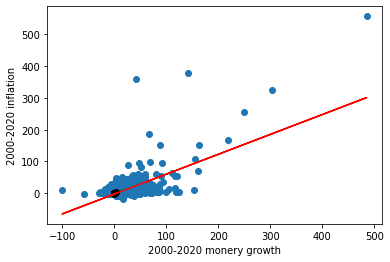

In [221]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

regression = LinearRegression().fit(x, y)
y_pred = regression.predict(x)

plt.scatter(x, y)
plt.scatter(japan_money_growth.values, japan_inflation.values, color='black')
plt.plot(x, y_pred, color='red')
plt.ylabel('2000-2020 inflation')
plt.xlabel('2000-2020 monery growth')

# # パラメータの表示
r2  = r2_score(x, y_pred)
print(df.corr())
print('R2. : {:.2f}'.format(r2))
plt.show()

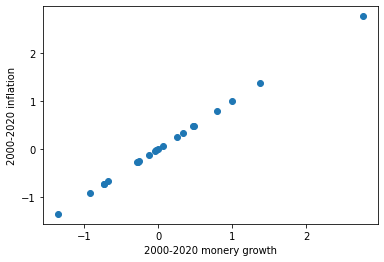

In [244]:
japan_money_growth = fixed_inflation.loc[['Japan']]
japan_inflation = fixed_inflation.loc[['Japan']]

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

plt.scatter(japan_money_growth.values, japan_inflation.values)
plt.ylabel('2000-2020 inflation')
plt.xlabel('2000-2020 monery growth')
plt.show()

# 人口増加率とGDPの散布図

https://data.worldbank.org/indicator

- Population growth (annual %)
    - https://databank.worldbank.org/metadataglossary/world-development-indicators/series/SP.POP.GROW
- GDP growth (annual %)
    - https://databank.worldbank.org/metadataglossary/world-development-indicators/series/NY.GDP.MKTP.KD.ZG

In [228]:
population = wb.download(indicator='SP.POP.GROW', start=2000, end=2020, country=country_codes)
population = population.rename(columns={'SP.POP.GROW': 'population'})
gdp        = wb.download(indicator='NY.GDP.MKTP.KD.ZG', start=2000, end=2020, country=country_codes)
gdp        = gdp.rename(columns={'NY.GDP.MKTP.KD.ZG': 'gdp'})


/Users/k-kakimoto/dev/ml_samples/.venv/lib/python3.8/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: 1A, 1W, 4E, 6F, 6N, 6X, 7E, 8S, A4, A5, A9, B1, B2, B3, B4, B6, B7, B8, C4, C5, C6, C7, C8, C9, D2, D3, D4, D5, D6, D7, D8, D9, EU, F1, F6, JG, M1, M2, N6, OE, R6, S1, S2, S3, S4, T2, T3, T4, T5, T6, T7, V1, V2, V3, V4, XC, XD, XE, XF, XG, XH, XI, XJ, XK, XL, XM, XN, XO, XP, XQ, XT, XU, XY, Z4, Z7, ZB, ZF, ZG, ZH, ZI, ZJ, ZQ, ZT
  warnings.warn(
/Users/k-kakimoto/dev/ml_samples/.venv/lib/python3.8/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: 1A, 1W, 4E, 6F, 6N, 6X, 7E, 8S, A4, A5, A9, B1, B2, B3, B4, B6, B7, B8, C4, C5, C6, C7, C8, C9, D2, D3, D4, D5, D6, D7, D8, D9, EU, F1, F6, JG, M1, M2, N6, OE, R6, S1, S2, S3, S4, T2, T3, T4, T5, T6, T7, V1, V2, V3, V4, XC, XD, XE, XF, XG, XH, XI, XJ, XK, XL, XM, XN, XO, XP, XQ, XT, XU, XY, Z4, Z7, ZB, ZF, ZG, ZH, ZI, ZJ, ZQ, ZT
  warnings.warn(


In [229]:
nan_population = population.query("population != population")

fixed_population = population.drop(index=nan_population.index)
fixed_gdp = gdp.drop(index=nan_population.index)

nan_gdp = gdp.query("gdp != gdp")
fixed_population = population.drop(index=nan_gdp.index)
fixed_gdp = gdp.drop(index=nan_gdp.index)

In [230]:
x = fixed_population.values
y = fixed_gdp.values
print(x.shape)
print(y.shape)
data = {'fixed_population': x.reshape(5270), 'fixed_gdp': y.reshape(5270)}
df = pd.DataFrame(data=data)


(5270, 1)
(5270, 1)


                  fixed_population  fixed_gdp
fixed_population          1.000000   0.188558
fixed_gdp                 0.188558   1.000000
R2. : -1.04


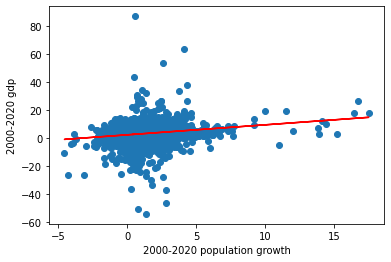

In [231]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

regression = LinearRegression().fit(x, y)
y_pred = regression.predict(x)

plt.scatter(x, y)
# plt.scatter(japan_money_growth.values, japan_inflation.values, color='black')
plt.plot(x, y_pred, color='red')
plt.xlabel('2000-2020 population growth')
plt.ylabel('2000-2020 gdp')

# # パラメータの表示
r2  = r2_score(x, y_pred)
print(df.corr())
print('R2. : {:.2f}'.format(r2))
plt.show()


# 人口増加率と一人当たりのGDPの関係

https://data.worldbank.org/indicator



In [239]:
gdp_per_capita = fixed_gdp
gdp_per_capita = fixed_gdp.values - fixed_population.values
gdp_per_capita

array([[-22.7469649 ],
       [ -2.52301497],
       [  0.80795174],
       ...,
       [ -9.14854045],
       [  1.08319149],
       [ -3.55496781]])

In [240]:
x = fixed_population.values
y = gdp_per_capita
print(x.shape)
print(y.shape)
data = {'fixed_population': x.reshape(5270), 'gdp_per_capita': y.reshape(5270)}
df = pd.DataFrame(data=data)


(5270, 1)
(5270, 1)


                  fixed_population  gdp_per_capita
fixed_population          1.000000       -0.077119
gdp_per_capita           -0.077119        1.000000
R2. : -0.81


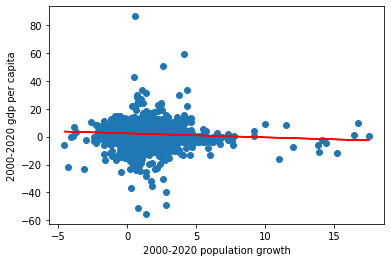

In [241]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

regression = LinearRegression().fit(x, y)
y_pred = regression.predict(x)

plt.scatter(x, y)
# plt.scatter(japan_money_growth.values, japan_inflation.values, color='black')
plt.plot(x, y_pred, color='red')
plt.xlabel('2000-2020 population growth')
plt.ylabel('2000-2020 gdp per capita')

# # パラメータの表示
r2  = r2_score(x, y_pred)
print(df.corr())
print('R2. : {:.2f}'.format(r2))
plt.show()
